In [1]:
print(8*9)

72


In [ ]:
# d = data.iloc[:,0].to_list()
# data_50 = []
# for i in range(0,len(d),50):
#     data_50.append(d[i:i+50])
    
# for i in data_50:
#     for i in range(len(i)):
#         print(i)

In [ ]:
# d = data.iloc[:,0].to_list()
# for i in range(len(d)):
#     if i<50:
#         print(d[i])
# print(len(d))

In [ ]:
# # el = ['23','62','43','53','52','132','51','12']
# el = [1,2,3,4,5,6,7,8,9,10]
# main = []
# for i in range(len(el)):
#     if i % 5 == 0:
#         main.append([el[i]])
#     main.append([el[i]])
#     # print(el[i])
# print(main)

In [ ]:
# d = data.iloc[:,0].to_list()
# data_50 = []
# for i in range(0,len(d),50):
#     data_50.append(d[i:i+50])

# for el in data_50:
#     print(el)
#     # for co in range(len(el)):
#     #     print(el[co])
#     #     # print(data_50)
#     #     break
#     # break

In [ ]:
# !pip install selenium
# !pip install webdriver-manager  # no need to download any driver file

In [1]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager

''' previously it was used 
# PATH = "C:Program Files (x86)/msedgedriver.exe"
# driver = webdriver.Edge()
'''

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')


In [7]:
# used if it close automatically
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.edge.options import Options

edge_options = Options()
edge_options.add_experimental_option("detach",True)

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()),options=edge_options) # it was closing on its own to not able to do it 
driver.get('https://www.screener.in/')


### Different methods

In [7]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time


driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')

# xpath Method
input = driver.find_element(By.XPATH,'/html/body/main/div[2]/div/div/div/input')
input.send_keys("Vedanta")
input.send_keys(Keys.RETURN)

# classmethod
# input = driver.find_element(By.CLASS_NAME,'u-full-width')
# input.send_keys("Vedanta")

# tagname method
# input = driver.find_element(By.TAG_NAME,'input')
# input.send_keys("Vedanta")

# name method
# driver.get("https://www.google.com")
# input = driver.find_element(By.NAME,'q').send_keys("Ferrari")

# Partial link text
# driver.find_element(By.PARTIAL_LINK_TEXT,"Gmail").click()

# Link text
# driver.find_element(By.LINK_TEXT,'Login').click()


In [ ]:
j=0
for i in range(1,54):
    print(f"{j} {(17*(i+j//17))-j}")
    if i% 17 !=0:
        if i == (17*(i+j//17))-j:
            j+=1
            continue
        else:
            print(f"/html/body/main/div[3]/div[3]/table/tbody/tr[{i}]")


In [ ]:
import pandas as pd

data = pd.read_csv('Screener\excel\Companies List for Screener Watchlist(Sheet1).csv',header=None)

d = data.iloc[1:,0].to_list()
data_50 = []
for i in range(0,len(d),50):
    data_50.append(d[i:i+50])


In [ ]:
for el in data_50:
    for co in range(len(el)):
        print(el[co])
    print()

# **For multiple rows**

In [3]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time

username = "melibi8600@exclussi.com"
password = "screener@12345"

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')

driver.find_element(By.XPATH,"/html/body/nav/div[2]/div/div/div/div[2]/div[2]/a[1]").click()
driver.find_element(By.NAME,"username").send_keys(username)
time.sleep(1)
driver.find_element(By.NAME,"password").send_keys(password)
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/main/div[2]/div[2]/form/button").click()
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/div/div[2]/main/div[1]/div[2]/a[1]").click()

data = {}

tr_rows = driver.find_elements(By.XPATH,"/html/body/main/div[3]/div[3]/table/tbody/tr")
req_rows = len(tr_rows)
# req_rows = 15

for cols in range(2,19):
    head = driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[1]/th[{cols}]').text
    data[head]=[]
    
for i in range(2, req_rows + 1):
   if (i - 1) % 16 == 0:
       continue
   for col in range(2, 19):
       header = driver.find_element(By.XPATH, f'/html/body/main/div[3]/div[3]/table/tbody/tr[1]/th[{col}]').text
       value = driver.find_element(By.XPATH, f'/html/body/main/div[3]/div[3]/table/tbody/tr[{i}]/td[{col + 1}]').text
       data[header].append(value)

time.sleep(1)
print("Your data is Scrap from Screener.in")
driver.close()

Your data is Scrap from Screener.in


In [ ]:
data

## For Sector wise

In [1]:
import pandas as pd

data = pd.read_csv("Finance Sector(Combine).csv",header=None)
# data = pd.read_csv("Banking(Sheet1).csv",header=None)
# print(len(data))
# data

In [ ]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time
import pandas as pd

username = "melibi8600@exclussi.com"
password = "screener@12345"

def extract_data():
    time.sleep(9)

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')

driver.find_element(By.XPATH,"/html/body/nav/div[2]/div/div/div/div[2]/div[2]/a[1]").click()
driver.find_element(By.NAME,"username").send_keys(username)
time.sleep(1)
driver.find_element(By.NAME,"password").send_keys(password)
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/main/div[2]/div[2]/form/button").click()
time.sleep(1)

driver.find_element(By.XPATH,"/html/body/div/div[2]/main/div[1]/div[2]/a[2]").click()

driver.find_element(By.XPATH,"/html/body/main/div[2]/div[1]/div[2]/a[2]").click()

input = driver.find_element(By.XPATH,"/html/body/main/div[3]/form/div/textarea")

data = pd.read_csv("Banking(Sheet1).csv",header=None)

d = data.iloc[:,0].to_list()
data_50 = []
for i in range(0,len(d),50):
    data_50.append(d[i:i+50])

for el in data_50:
    for co in range(len(el)):
        input.send_keys([f"{el[co]}\n"])
    extract_data()
    '''
        Call function which will 
        1) Extract from csv Batches of 50 
        2) Insert into screener & imported into watchlist
        3) Extract watchlist & insert into Postgres
        4) Delete the 50 companies
    '''
    break


driver.find_element(By.XPATH,"/html/body/main/div[3]/form/button").click()
time.sleep(3)
driver.find_element(By.XPATH,"/html/body/main/div[2]/form/button").click()
print("Added from Excel")
driver.close()

KeyboardInterrupt: 

## To Delete the selected Stocks

In [ ]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time

username = "melibi8600@exclussi.com"
password = "screener@12345"

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')

driver.find_element(By.XPATH,"/html/body/nav/div[2]/div/div/div/div[2]/div[2]/a[1]").click()
driver.find_element(By.NAME,"username").send_keys(username)
time.sleep(1)
driver.find_element(By.NAME,"password").send_keys(password)
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/main/div[2]/div[2]/form/button").click()
time.sleep(1)

driver.find_element(By.XPATH,"/html/body/div/div[2]/main/div[1]/div[2]/a[2]").click()

ul = driver.find_elements(By.XPATH,"/html/body/main/div[2]/div[2]/ul/li")

total_comp = len(ul)
isNotZero = True

while isNotZero:
    if total_comp == 0:
        isNotZero = False
    else:
        for i in range(total_comp):
            driver.find_element(By.XPATH,"/html/body/main/div[2]/div[2]/ul/li[1]/button/i").click()
            time.sleep(2)
            
        break
    total_comp = len(driver.find_elements(By.XPATH,"/html/body/main/div[2]/div[2]/ul/li"))

# To check it 
print("Deleted ALL")
driver.close()

Deleted ALL


## **Insert into Postgres**

In [49]:
import psycopg2

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres',user='postgres',password="mypass",port=5431)
    cur = conn.cursor()
    cols = [col.replace(" ",'_') for col,_ in data.items()]
    cols = [col.replace('%','PERCENT') for col in cols]
    cols = [col.replace('.','') for col in cols]
    cols = [col.replace('/','BY') for col in cols]
    rows = [v for _,v in data.items()]
    cur.execute("select name from stocks")
    conn.commit()
    company_name = []
    for i in cur.fetchall():
        company_name.append(i[0])

    row_data = []
    li =[]

    # print(cols)

    for row in range(len(rows)):
        for col in range(len(rows[row])):
            for r in range(len(rows)):
                if rows[r][col] == '':
                    li.append(0)
                    continue
                li.append(rows[r][col])
            row_data.append(li)
            li=[]
        break
    
    for row in row_data:
        if row[0] not in company_name:
            print(row[0])
            cur.execute(f"""
                insert into stocks ({', '.join(cols)})
                values ({', '.join(['%s'] * len(cols))})
            """,row)
            conn.commit()
            print("Inserted into stocks table.")
        

except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

name 'data' is not defined


In [ ]:
rows[-1]

In [ ]:
sector =['Banking','Auto']
for i in sector:
    cols.append('Sector')
    cols

### **Implementation on the data from the postgres**

In [68]:
import psycopg2
import numpy as np
import pandas as pd

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres', user='postgres', password='mypass', port=5431)
    cur = conn.cursor()

    cur.execute("select * from stocks")
    conn.commit()
    li=[]
    for i in cur.fetchall():
        li.append(i)

    cur.execute(f"""
        select column_name, data_type
        from information_schema.columns
        where table_schema='public'
        and table_name = 'stocks';
        """)
    columns = cur.fetchall()
    col=[]
    for c,_ in columns:
        col.append(c)

except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

In [69]:
col = []
for c,_ in columns:
    col.append(c)
col

['id',
 'name',
 'cmp_rs',
 'mar_cap_rscr',
 'div_yld_percent',
 'np_qtr_rscr',
 'qtr_profit_var_percent',
 'qtr_sales_var_percent',
 'roce_percent',
 'roe_percent',
 'sales_growth_percent',
 'profit_growth_percent',
 'no_of_share_holders',
 'eps_12m_rs',
 'ev_by_ebitda',
 'rsi',
 'current_ratio',
 'debt_by_eq']

### High quality stocks

In [70]:
# del df

In [71]:
import pandas as pd

df = pd.DataFrame(li,columns=col)

df

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq
0,1,CIE Automotive,416.20,15779.75,1.68,184.98,1.11,-5.82,16.59,13.15,-3.41,-26.61,124238.00,21.81,10.75,56.86,1.13,0.09
1,2,HBL Engineering,525.65,14584.48,0.10,64.67,-20.27,-24.81,35.94,27.73,3.74,39.11,381826.00,11.31,30.73,59.00,2.67,0.05
2,3,Hero Motocorp,3940.50,78841.00,2.92,1108.38,1.51,4.82,29.09,21.95,10.83,11.33,947407.00,207.65,12.10,61.42,1.64,0.03
3,4,MRF,127980.00,54313.70,0.16,315.46,-38.11,13.60,16.12,12.55,11.22,-13.45,61320.00,4134.00,13.28,78.27,1.42,0.18
4,5,Hindustan Motors,27.73,584.19,0.00,3.34,-70.23,-56.93,2.32,16.74,201.46,238.70,268037.00,1.55,15.53,64.15,1.54,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,269,Alldigi Tech,973.80,1485.69,4.62,19.92,76.91,16.42,30.54,25.98,18.38,27.82,16772.00,55.61,10.66,55.83,3.39,0.15
269,270,Quadpro ITeS,3.70,18.70,0.00,0.40,185.71,0.73,6.38,4.31,2.84,64.62,850.00,0.21,5.29,51.01,8.32,0.00
270,271,Alphalogic Tech.,95.57,598.43,0.00,1.63,5.98,45.09,17.09,12.25,81.00,6.49,11843.00,0.76,67.31,48.50,3.92,0.20
271,272,Cadsys (India),82.25,82.27,0.00,-12.45,-250.31,-44.31,12.18,14.68,-19.99,-129.24,964.00,-2.78,22.87,61.76,2.34,1.44


Converting columns to float type

fdf = df.iloc[:,2:].astype(float)

n = df.iloc[:,[2]].astype(str)

i = df.iloc[:,0].astype(int)

df.info()

To convert numeric values to float previously they are in object

In [72]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        continue

## High Value Stocks

In [ ]:
df

In [73]:
import pandas as pd

df['is_high_quality'] = ((df['roe_percent']>15) & 
# high_quality = df[(df['roe_percent']>15) & 
   (df['roce_percent']>15) &
   (df['eps_12m_rs']>10) &
   (df['ev_by_ebitda']>10) &
   (df['div_yld_percent']>1) &
   (df['rsi']<70) &
   (df['mar_cap_rscr']>1000))
# df['high_quality']


In [ ]:
df

### Undervalued stocks

In [74]:
df['is_under_value'] = ((df['roe_percent']>15) &
   (df['debt_by_eq']<0.5) &
   (df['current_ratio']>2))

### High quality & undervalued stocks

In [ ]:
df.info(columns)

In [75]:
df[df['is_under_value'] == True]

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,sales_growth_percent,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq,is_high_quality,is_under_value
1,2,HBL Engineering,525.65,14584.48,0.10,64.67,-20.27,-24.81,35.94,27.73,3.74,39.11,381826.0,11.31,30.73,59.00,2.67,0.05,False,True
28,29,ADC India,1284.25,590.76,1.95,5.83,-8.62,-0.36,45.23,33.69,9.78,120.54,8479.0,61.85,14.11,56.22,3.73,0.00,False,True
29,30,Suyog Telematics,979.90,1066.16,0.13,17.18,-10.10,16.92,21.62,23.77,17.79,16.30,15204.0,65.25,8.58,52.87,2.49,0.46,False,True
51,52,Cams Services,4102.00,20287.27,1.13,117.82,37.72,29.26,49.77,40.47,27.92,38.55,459662.0,87.69,31.51,68.41,3.28,0.08,True,True
52,53,KFin Technolog.,1286.60,22125.60,0.45,90.18,34.94,32.60,30.26,24.47,30.80,40.87,227756.0,18.79,44.35,74.72,4.47,0.04,False,True
53,54,C D S L,1360.90,28442.81,0.70,129.80,20.83,29.67,40.18,31.31,57.78,57.30,1529589.0,26.58,36.29,67.87,2.42,0.00,False,True
98,99,Schaeffler India,3281.60,51287.23,0.85,249.33,12.92,12.25,25.67,19.17,11.77,7.34,74544.0,62.55,31.44,51.85,2.87,0.01,False,True
102,103,SKP Securities,122.20,83.20,1.23,1.67,-44.33,-0.89,30.32,22.89,43.33,88.69,3707.0,17.15,3.70,51.54,2.20,0.24,False,True
106,107,Wallfort Fin.,111.27,107.79,0.00,-5.84,-168.30,-86.25,27.01,22.03,16.92,-12.67,3494.0,25.47,2.20,51.57,4.37,0.00,False,True
119,120,Meghna Infracon,881.95,957.96,0.01,3.40,750.00,-29.69,21.05,27.32,-56.07,2070.37,1347.0,5.40,140.83,69.38,36.02,0.00,False,True


In [76]:
df['is_high_undervalued'] = ((df['is_under_value'] == True) & (df['is_high_quality'] == True))

In [77]:
column_names_list = df.columns.tolist()

In [ ]:
df

In [80]:
table_schema = []
for i in cols:
    if i == 'id':
        table_schema.append(f'{i} serial primary key')
    elif i == 'name':
        table_schema.append(f'{i} text')
    elif i in ['is_high_quality','is_under_value','is_high_undervalued']:
        table_schema.append(f'{i} boolean')
    else:
        table_schema.append(f'{i} numeric')
print(table_schema)
        

['id serial primary key', 'name text', 'cmp_rs numeric', 'mar_cap_rscr numeric', 'div_yld_percent numeric', 'np_qtr_rscr numeric', 'qtr_profit_var_percent numeric', 'qtr_sales_var_percent numeric', 'roce_percent numeric', 'roe_percent numeric', 'sales_growth_percent numeric', 'profit_growth_percent numeric', 'no_of_share_holders numeric', 'eps_12m_rs numeric', 'ev_by_ebitda numeric', 'rsi numeric', 'current_ratio numeric', 'debt_by_eq numeric', 'is_high_quality boolean', 'is_under_value boolean', 'is_high_undervalued boolean']


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      273 non-null    int64  
 1   name                    273 non-null    object 
 2   cmp_rs                  273 non-null    float64
 3   mar_cap_rscr            273 non-null    float64
 4   div_yld_percent         273 non-null    float64
 5   np_qtr_rscr             273 non-null    float64
 6   qtr_profit_var_percent  273 non-null    float64
 7   qtr_sales_var_percent   273 non-null    float64
 8   roce_percent            273 non-null    float64
 9   roe_percent             273 non-null    float64
 10  sales_growth_percent    273 non-null    float64
 11  profit_growth_percent   273 non-null    float64
 12  no_of_share_holders     273 non-null    float64
 13  eps_12m_rs              273 non-null    float64
 14  ev_by_ebitda            273 non-null    fl

In [ ]:
import psycopg2

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres',user='postgres',password="mypass",port=5431)
    cur = conn.cursor()
    cols = df.columns.tolist()
    row_data = df.values.tolist()
    # print(cols)
    # for i in row_data:
    #     for j in i:
    #         print(type(j))
    #     break
    # print(row_data)
    table_schema = []
    for i in cols:
        if i == 'id':
            table_schema.append(f'{i} serial primary key')
        elif i == 'name':
            table_schema.append(f'{i} text')
        elif i in ['is_high_quality','is_under_value','is_high_undervalued']:
            table_schema.append(f'{i} boolean')
        else:
            table_schema.append(f'{i} numeric')
    
    print(table_schema)
    # cur.execute(f"""
    #     create table transform_stock(
    #         {", ".join(table_schema)}
    #         )
    # """)
    # conn.commit()

    print("table is created")
    
    # insert into table

    for row in row_data:
        cur.execute(f"""
            insert into transform_stock ({', '.join(cols)})
            values ({', '.join(['%s'] * len(cols))})
        """,row)
        conn.commit()
        print("Inserted into stocks table.") 
        

except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

In [92]:
import psycopg2
import numpy as np
import pandas as pd

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres', user='postgres', password='mypass', port=5431)
    cur = conn.cursor()

    cur.execute("select * from transform_stock")
    conn.commit()
    li=[]
    for i in cur.fetchall():
        li.append(i)

    cur.execute(f"""
        select column_name, data_type
        from information_schema.columns
        where table_schema='public'
        and table_name = 'transform_stock';
        """)
    columns = cur.fetchall()
    col=[]
    for c,_ in columns:
        col.append(c)

except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

In [93]:
col = []
for c,_ in columns:
    col.append(c)
col

['id',
 'name',
 'cmp_rs',
 'mar_cap_rscr',
 'div_yld_percent',
 'np_qtr_rscr',
 'qtr_profit_var_percent',
 'qtr_sales_var_percent',
 'roce_percent',
 'roe_percent',
 'sales_growth_percent',
 'profit_growth_percent',
 'no_of_share_holders',
 'eps_12m_rs',
 'ev_by_ebitda',
 'rsi',
 'current_ratio',
 'debt_by_eq',
 'is_high_quality',
 'is_under_value',
 'is_high_undervalued']

In [94]:
import pandas as pd

df = pd.DataFrame(li,columns=col)

df

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,...,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq,is_high_quality,is_under_value,is_high_undervalued
0,1,CIE Automotive,416.2,15779.75,1.68,184.98,1.11,-5.82,16.59,13.15,...,-26.61,124238.0,21.81,10.75,56.86,1.13,0.09,False,False,False
1,2,HBL Engineering,525.65,14584.48,0.1,64.67,-20.27,-24.81,35.94,27.73,...,39.11,381826.0,11.31,30.73,59.0,2.67,0.05,False,True,False
2,3,Hero Motocorp,3940.5,78841.0,2.92,1108.38,1.51,4.82,29.09,21.95,...,11.33,947407.0,207.65,12.1,61.42,1.64,0.03,True,False,False
3,4,MRF,127980.0,54313.7,0.16,315.46,-38.11,13.6,16.12,12.55,...,-13.45,61320.0,4134.0,13.28,78.27,1.42,0.18,False,False,False
4,5,Hindustan Motors,27.73,584.19,0.0,3.34,-70.23,-56.93,2.32,16.74,...,238.7,268037.0,1.55,15.53,64.15,1.54,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,269,Alldigi Tech,973.8,1485.69,4.62,19.92,76.91,16.42,30.54,25.98,...,27.82,16772.0,55.61,10.66,55.83,3.39,0.15,True,True,True
269,270,Quadpro ITeS,3.7,18.7,0.0,0.4,185.71,0.73,6.38,4.31,...,64.62,850.0,0.21,5.29,51.01,8.32,0.0,False,False,False
270,271,Alphalogic Tech.,95.57,598.43,0.0,1.63,5.98,45.09,17.09,12.25,...,6.49,11843.0,0.76,67.31,48.5,3.92,0.2,False,False,False
271,272,Cadsys (India),82.25,82.27,0.0,-12.45,-250.31,-44.31,12.18,14.68,...,-129.24,964.0,-2.78,22.87,61.76,2.34,1.44,False,False,False


In [ ]:
import matplotlib.pyplot as plt

x = df['name'].tolist()
y = df['roe_percent'].tolist()


plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.title('ROE')
plt.xlabel('Names')
plt.xticks(rotation=45)
plt.ylabel('ROE %')
plt.show()

In [99]:
df[df['is_high_quality'] == True]['name']

2         Hero Motocorp
22        Maruti Suzuki
51        Cams Services
120    Wealth First Por
132                ICRA
133              CRISIL
148      Life Insurance
161    Nippon Life Ind.
240             UTI AMC
247          Aditya AMC
268        Alldigi Tech
Name: name, dtype: object

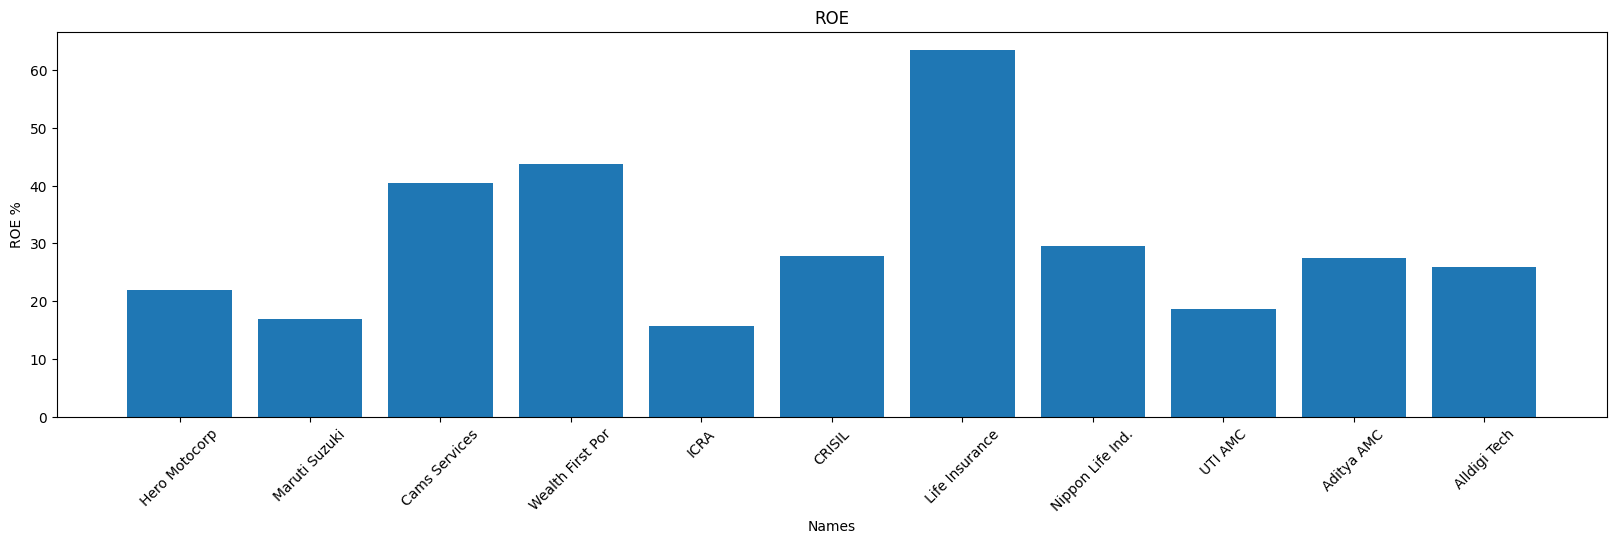

In [104]:
import matplotlib.pyplot as plt

x = df[df['is_high_quality'] == True]['name'].tolist()
y = df[df['is_high_quality'] == True]['roe_percent'].tolist()


plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.title('ROE')
plt.xlabel('Names')
plt.ylabel('ROE %')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x = df['name'].tolist()
y = df['eps_12m_rs'].tolist()


plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.title('EPS')
plt.xlabel('Names')
plt.xticks(rotation=45)
plt.ylabel('EPS')
plt.show()

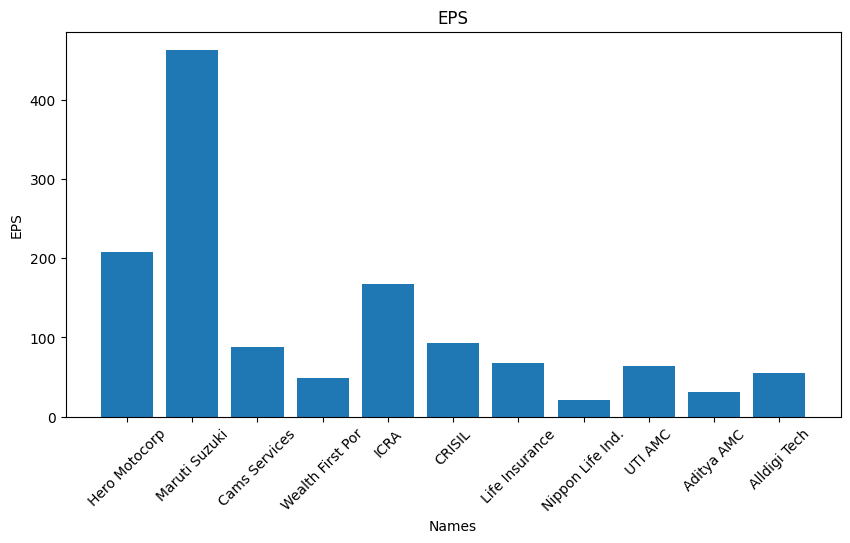

In [103]:
import matplotlib.pyplot as plt

x = df[df['is_high_quality'] == True]['name'].tolist()
y = df[df['is_high_quality'] == True]['eps_12m_rs'].tolist()

plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title('EPS')
plt.xlabel('Names')
plt.ylabel('EPS')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# df['roe_percent'].max()
# df['name'].tolist()
df.describe()

In [ ]:
d = df.iloc[:,2:].corr()
d

In [ ]:
df.iloc[:,2:].corr()

In [ ]:
import matplotlib.pyplot as plt
# Market Capitalization data (in cr)
companies = df[df['is_high_quality'] == True]['name'].tolist()
market_caps = df[df['is_high_quality'] == True]['mar_cap_rscr'].tolist()
# Pie chart
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'violet', 'grey']

plt.figure(figsize=(8, 8))
plt.pie(market_caps, labels=companies, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Market Capitalization Share of Top 5 Companies and Others')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

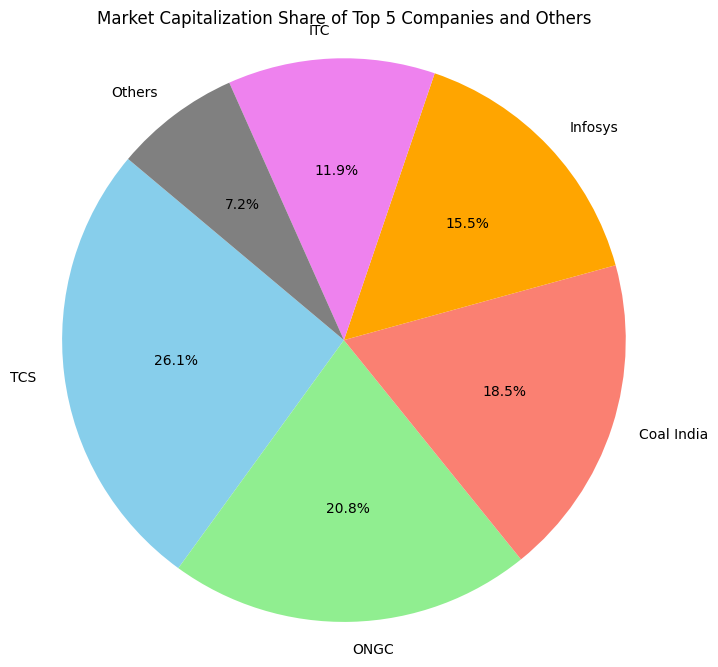

In [109]:
import matplotlib.pyplot as plt
# Market Capitalization data (in cr)
companies = ['TCS', 'ONGC', 'Coal India', 'Infosys', 'ITC', 'Others']
market_caps = [12300, 9800, 8700, 7300, 5600, 3400]  # Total = 47100
# Pie chart
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'violet', 'grey']
# explode = (0.1, 0, 0, 0, 0, 0)  # Emphasize TCS
plt.figure(figsize=(8, 8))
plt.pie(market_caps, labels=companies, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Market Capitalization Share of Top 5 Companies and Others')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

In [ ]:
d = df.iloc[:,2:].corr()
da = d[d>0.7]
da

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

matrix = da

plt.figure(figsize=(7,7))
sns.heatmap(matrix, cmap="Greens", annot=True)

We need to noramlize the columns \
then we can check using bar graph if there is any relation then we can further find out the graph which we need to use 

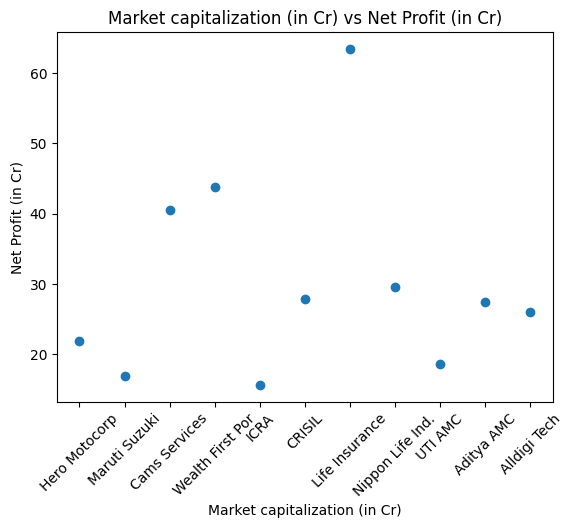

In [110]:
mar_cap = df['mar_cap_rscr']
np_qtr = df['np_qtr_rscr']

plt.scatter(x,y)
plt.xlabel('Market capitalization (in Cr)')
plt.ylabel('Net Profit (in Cr)')
plt.title('Market capitalization (in Cr) vs Net Profit (in Cr)')
plt.xticks(rotation=45)
plt.show()

In [111]:
df.sort_values(by='mar_cap_rscr',ascending=False).head(3)

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,...,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq,is_high_quality,is_under_value,is_high_undervalued
83,84,HDFC Bank,1923.9,1472060.85,1.01,19284.57,6.88,9.25,7.51,14.53,...,10.78,3829146.0,92.51,17.2,66.74,0.0,6.46,False,False,False
49,50,Bharti Airtel,1881.6,1128877.85,0.43,16134.6,230.71,19.08,13.13,14.93,...,75.32,833428.0,43.24,14.69,69.41,0.36,2.59,False,False,False
82,83,ICICI Bank,1424.4,1014950.35,0.7,14353.69,15.69,13.57,7.88,17.97,...,15.33,1902503.0,71.65,17.76,74.31,0.0,5.97,False,False,False


In [112]:
df[['mar_cap_rscr','np_qtr_rscr']].head(10)

,mar_cap_rscr,np_qtr_rscr
0,15779.75,184.98
1,14584.48,64.67
2,78841.0,1108.38
3,54313.7,315.46
4,584.19,3.34
5,546.42,3.84
6,746.26,0.53
7,12222.65,97.03
8,1391.74,7.12
9,29208.38,337.25


Normalizing the columns

In [ ]:
df[['mar_cap_rscr','np_qtr_rscr']]

In [ ]:
df['mar_cap_rscr'].plot(kind='bar')

In [ ]:
df['np_qtr_rscr'].plot(kind='bar')

The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.

In [ ]:
df_max_scaled = df.copy()

column = 'np_qtr_rscr'
df_max_scaled[column] = df_max_scaled[column]/df_max_scaled[column].abs().max()

df_max_scaled['np_qtr_rscr']

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.

In [ ]:
df_min_max_scaled = df.copy() 
  
column = 'np_qtr_rscr'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
  
df_min_max_scaled['np_qtr_rscr']

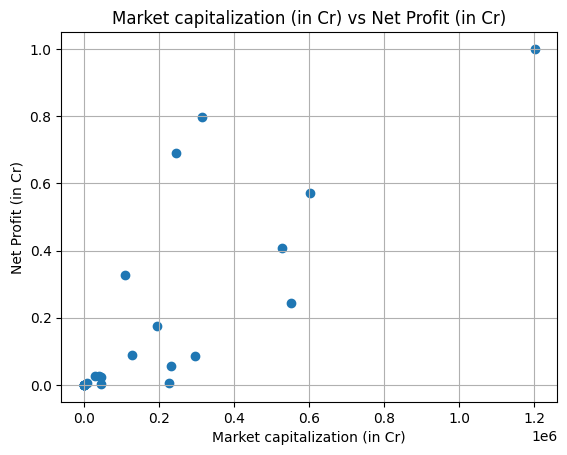

In [ ]:
x = df_min_max_scaled['mar_cap_rscr']
y = df_min_max_scaled['np_qtr_rscr']


plt.scatter(x,y)
plt.xlabel('Market capitalization (in Cr)')
plt.ylabel('Net Profit (in Cr)')
plt.grid()
plt.title('Market capitalization (in Cr) vs Net Profit (in Cr)')
# plt.xticks(rotation=45)
plt.show()

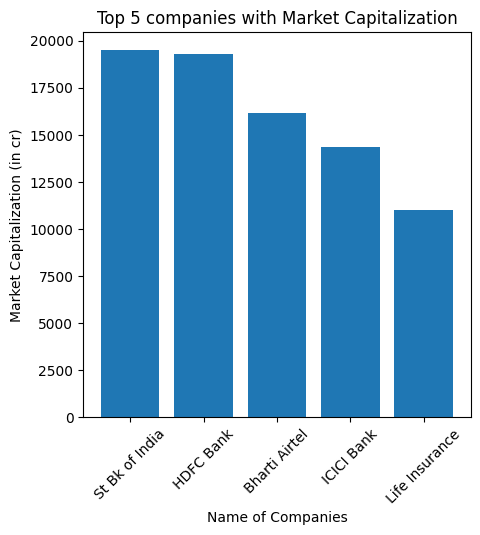

In [115]:
np_qtr = df.sort_values(by='np_qtr_rscr',ascending=False).head(5)['np_qtr_rscr']
mar_cap = df.sort_values(by='mar_cap_rscr',ascending=False).head(5)['mar_cap_rscr']
name = df.sort_values(by='np_qtr_rscr',ascending=False).head(5)['name']

plt.figure(figsize=(5,5))
# plt.plot(name,np_qtr,color='green')
plt.bar(name,np_qtr)
plt.xlabel('Name of Companies')
plt.ylabel('Market Capitalization (in cr)')
plt.title('Top 5 companies with Market Capitalization')
plt.xticks(rotation=45)
plt.show()
# np_qtr

In [ ]:
import matplotlib.pyplot as plt
# Market Capitalization data (in cr)
# companies = df[df['is_high_quality'] == True]['name'].tolist()
name = df.sort_values(by='np_qtr_rscr',ascending=False).head(5)['name']
np_qtr = df.sort_values(by='np_qtr_rscr',ascending=False).head(5)['np_qtr_rscr']
# market_caps = df[df['is_high_quality'] == True]['mar_cap_rscr'].tolist()
# Pie chart
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'violet', 'grey']

plt.figure(figsize=(8, 8))
plt.pie(market_caps, labels=companies, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Market Capitalization Share of Top 5 Companies and Others')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

In [1]:
import matplotlib.pyplot as plt
# Market Capitalization data (in cr)
companies = df[df['is_high_quality'].head(4) == True]['name'].tolist()
market_caps = df[df['is_high_quality'].head(4) == True]['mar_cap_rscr'].tolist()
# Pie chart
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'violet', 'grey']

plt.figure(figsize=(8, 8))
plt.pie(market_caps, labels=companies, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Market Capitalization Share of Top 5 Companies and Others')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

NameError: name 'df' is not defined

The bar is not plot on the graph cuz the difference for a particular column is more between the max & min values so the bar are not visible in this graph.\
And increasing in directly proportion to each other.

Normalization for eps & cmp

In [ ]:
df[['eps_12m_rs','cmp_rs']]

<Axes: >

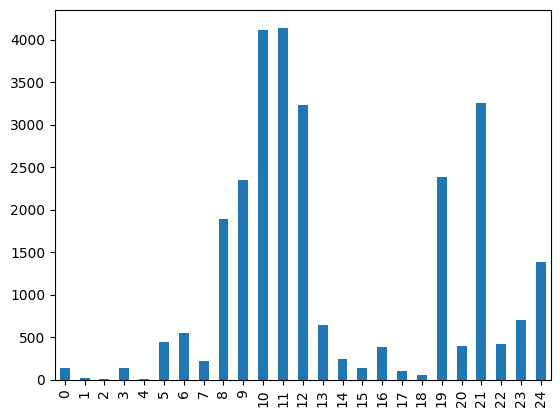

In [ ]:
df['cmp_rs'].plot(kind='bar')

<Axes: >

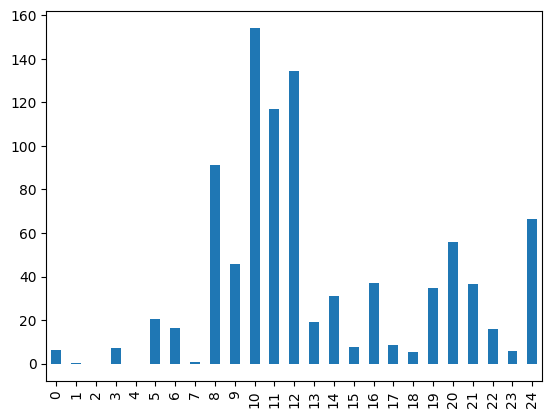

In [ ]:
df['eps_12m_rs'].plot(kind='bar')

In [ ]:
df_max_cmp = df.copy()

column = 'eps_12m_rs'
df_max_cmp[column] = df_max_cmp[column] / df_max_cmp[column].abs().max()

df_max_cmp[['eps_12m_rs']]

,eps_12m_rs
0,0.040249
1,0.001685
2,-0.000194
3,0.047119
4,0.000259
5,0.131700
6,0.105321
7,0.004861
8,0.591743
9,0.296325


In [ ]:
df_min_max_eps = df.copy() 
  
column = 'eps_12m_rs'
df_min_max_eps[column] = (df_min_max_eps[column] - df_min_max_eps[column].min()) / (df_min_max_eps[column].max() - df_min_max_eps[column].min())     
  
df_min_max_eps['eps_12m_rs']

0     0.040435
1     0.001879
2     0.000000
3     0.047304
4     0.000454
5     0.131869
6     0.105495
7     0.005054
8     0.591822
9     0.296462
10    1.000000
11    0.756869
12    0.869816
13    0.125648
14    0.201140
15    0.048924
16    0.240798
17    0.055534
18    0.034279
19    0.226218
20    0.362299
21    0.236457
22    0.104653
23    0.036547
24    0.431765
Name: eps_12m_rs, dtype: float64

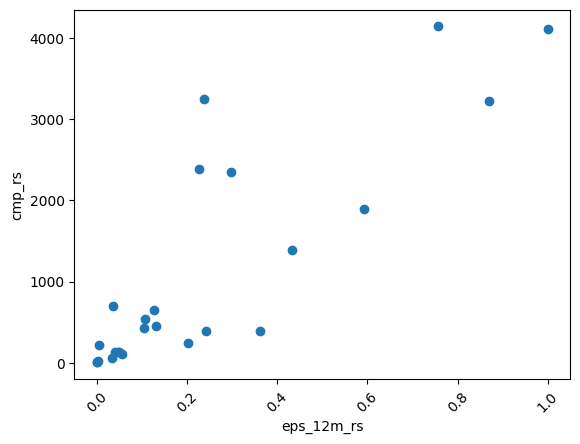

In [ ]:
x = df_min_max_eps['eps_12m_rs']
y = df_min_max_eps['cmp_rs']

plt.scatter(x,y)
plt.xticks(rotation=45)
plt.xlabel('eps_12m_rs')
plt.ylabel('cmp_rs')
plt.show()
# x,y

In [ ]:
'''
    ROE > 15
    DEBT-BY-EQ < 0.5
    CURRENT-RATIO > 2
'''

under_value = df[(df['roe_percent']>15) &
   (df['debt_by_eq']<0.5) &
   (df['current_ratio']>2)]
under_value

In [ ]:
import pandas as pd


'''
ROE > 15 
ROCE > 15 
EPS > 10 
Sales growth > 10 
Profit growth > 10 
EVEBITDA < 10 
Dividend yield > 1 
RSI < 60 AND
Market Capitalization > 1000
'''
# df[(df['roe_percent']>15) & 
#    (df['roce_percent']>15) &
#    (df['eps_12m_rs']>10) &
#    (df['ev_by_ebitda']>10) &
#    (df['div_yld_percent']>1) &
#    (df['rsi']<70) &
#    (df['mar_cap_rscr']>1000) &
#    (df['sales_growth_percent']>10) & 
#    (df['profit_growth_percent']>10)]


high_quality = df[(df['roe_percent']>15) & 
   (df['roce_percent']>15) &
   (df['eps_12m_rs']>10) &
   (df['ev_by_ebitda']>10) &
   (df['div_yld_percent']>1) &
   (df['rsi']<70) &
   (df['mar_cap_rscr']>1000)]


high_quality

In [ ]:
# y= df_min_max_eps['eps_12m_rs']
# x = df_min_max_eps['cmp_rs']
# plt.bar(x,y)
# plt.xticks(rotation=45)
# plt.ylabel('Normalized_eps_12m_rs')
# plt.xlabel('Normalized_cmp_rs')
# plt.show()

# x1,y1

In [ ]:
# x= df_max_cmp['eps_12m_rs']
# y = df_max_cmp['cmp_rs']
# plt.bar(x,y)
# plt.xticks(rotation=45)
# plt.xlabel('Normalized_eps_12m_rs')
# plt.ylabel('Normalized_cmp_rs')
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# x = df['ev_by_ebitda'].tolist()

# plt.figure(figsize=(5,5))
# plt.hist(x)
# plt.title('hist')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate random data
# data = np.random.randn(1000)

# # Create a histogram with density and custom color
# plt.figure(figsize=(5,5))
# plt.hist(data, bins=30, density=True, color='green', edgecolor='black', alpha=0.7)
# plt.xlabel('Values')
# plt.ylabel('Probability Density')
# plt.title('Customized Histogram with Density')
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# plt.imshow(np.random.random((50,50)))
# plt.colorbar()
# plt.show()

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [ ]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['ev_by_ebitda'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title("Distribution of EV/EBITDA")
plt.xlabel("EV/EBITDA")
plt.ylabel("Number of Companies")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['div_yld_percent'], df['profit_growth_percent'], alpha=0.7, color='teal')
plt.xlabel("Dividend Yield (%)")
plt.ylabel("Profit Growth (%)")
plt.title("Dividend Yield vs Profit Growth")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['ev_by_ebitda'], df['roe_percent'], alpha=0.7, color='orange')
plt.xlabel("EV/EBITDA")
plt.ylabel("ROE (%)")
plt.title("ROE vs EV/EBITDA")
plt.axhline(15, color='red', linestyle='--', label='ROE = 15%')
plt.axvline(10, color='blue', linestyle='--', label='EV/EBITDA = 10')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
filtered_stocks = df[(df['roe_percent'] > 15) & (df['ev_by_ebitda'] < 10)]
print("Filtered Stocks Summary Table")
print(filtered_stocks[['cmp_rs', 'roe_percent', 'eps_12m_rs', 'ev_by_ebitda']])top_roe = df.nlargest('roe_percent')
plt.figure(figsize=(10, 6))
plt.barh(top_roe['cmp_rs'], top_roe['roe_percent'], color='green')
plt.xlabel("ROE (%)")
plt.title("Top 10 Stocks by ROE")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print("\nKPI Summary:")
print(f"Total Companies: {len(df)}")
print(f"Filtered Companies: {len(filtered_stocks)}")
print(f"Average ROE: {df['roe_percent'].mean():.2f}%")
print(f"Average Dividend Yield: {df['div_yld_percent'].mean():.2f}%")
print(f"Average EV/EBITDA: {df['ev_by_ebitda'].mean():.2f}")


In [ ]:
data 
cols = [col.replace(" ",'_') for col,_ in data.items()]
cols = [col.replace('%','PERCENT') for col in cols]
cols = [col.replace('.','') for col in cols]
cols = [col.replace('/','BY') for col in cols]
rows = [v for k,v in data.items()]
# print(len(cols),len(rows))
# print(cols)
    # print(rows)
company_name = rows[0]
# if 
row_data = []
li =[]
for row in range(len(rows)):
    for col in range(len(rows[row])):
        for r in range(len(rows)):
            if rows[r][col] == '':
                li.append('NULL')
                continue
            li.append(rows[r][col])
        row_data.append(li)
        li=[]
    break
print(row_data)

[['ITC Hotels', '199.25', '41467.40', '0.00', '0.74', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', '2596732.00', 'NULL', 'NULL', 'NULL', '54.18'], ['ITC', '420.05', '525655.64', '3.26', '5013.18', '-8.40', '9.28', '37.47', '75160.56', '28.43', '7.73', '-2.09', '3710169.00', '12.89', '16.12', '18.01', '58.08'], ['Jubilant Food.', '688.00', '45397.31', '0.18', '43.24', '-21.97', '56.06', '11.20', '7611.34', '12.98', '42.24', '4.08', '363143.00', '19.52', '5.61', '31.32', '57.96'], ['Vedanta', '384.00', '150158.96', '11.34', '4876.00', '76.20', '10.06', '20.91', '148022.00', '10.49', '1.28', '138.51', '1999975.00', '17.76', '33.58', '5.08', '26.48'], ['Infosys', '1423.05', '591030.16', '2.66', '6822.00', '11.46', '7.58', '39.99', '159988.00', '31.83', '4.44', '13.36', '2542766.00', '15.22', '66.60', '13.32', '26.53']]


In [ ]:
cols = [col.replace(" ",'_') for col,_ in data.items()]
cols = [col.replace('%','PERCENT') for col in cols]
cols = [col.replace('.','') for col in cols]
cols = [col.replace('/','BY') for col in cols]
for i in cols:
    print(f'{i} numeric,')

Name numeric,
CMP_Rs numeric,
Mar_Cap_RsCr numeric,
Div_Yld_PERCENT numeric,
NP_Qtr_RsCr numeric,
Qtr_Profit_Var_PERCENT numeric,
Qtr_Sales_Var_PERCENT numeric,
ROCE_PERCENT numeric,
ROE_PERCENT numeric,
Sales_growth_PERCENT numeric,
Profit_growth_PERCENT numeric,
No_of_Share_Holders numeric,
EPS_12M_Rs numeric,
EV_BY_EBITDA numeric,
RSI numeric,
Current_ratio numeric,
Debt_BY_Eq numeric,


In [ ]:
for i,j in data.items():
    print(i,j)

Name ['Infosys', 'Vedanta']
CMP Rs. [1403.7, 370.55]
Mar Cap Rs.Cr. [582993.59, 144899.43]
Div Yld % [2.71, 11.74]
NP Qtr Rs.Cr. [6822.0, 4876.0]
Qtr Profit Var % [11.46, 76.2]
Qtr Sales Var % [7.58, 10.06]
ROCE % [39.99, 20.91]
Sales Rs.Cr. [159988.0, 148022.0]
ROE % [31.83, 10.49]
Sales growth % [4.44, 1.28]
Profit growth % [13.36, 138.51]
No. of Share Holders [2542766.0, 1999975.0]
Sales Var 3Yrs % [15.22, 17.76]
EPS 12M Rs. [66.6, 33.58]
EV / EBITDA [13.13, 4.95]
RSI [26.53, 26.48]


In [ ]:
dat = {'Name': []}
for i in range(3):
    dat['Name'].append(i)
print(dat)

{'Name': [0, 1, 2]}


# One single row

In [ ]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time
import pandas as pd
import numpy as np

username = "melibi8600@exclussi.com"
password = "screener@12345"

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.screener.in/')

driver.find_element(By.XPATH,"/html/body/nav/div[2]/div/div/div/div[2]/div[2]/a[1]").click()
driver.find_element(By.NAME,"username").send_keys(username)
time.sleep(2)
driver.find_element(By.NAME,"password").send_keys(password)
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/main/div[2]/div[2]/form/button").click()
time.sleep(3)
driver.find_element(By.XPATH,"/html/body/div/div[2]/main/div[1]/div[2]/a[1]").click()

li_d=[]
data = {}

for i in range(2,19):
    head = driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[1]/th[{i}]').text 
    if i >= 2: 
        value=driver.find_element(By.XPATH,f'/html/body/main/div[3]/div[3]/table/tbody/tr[2]/td[{i+1}]').text
        if value.isalpha():
            pass
        else:
            value=float(value)
    data[head]=value
    head,value='',''
    
# data.append(data)
df = pd.DataFrame(data,index=[1])
print(df)
# print(data)
# df.to_csv('stock.csv',index=False)
time.sleep(5)
driver.close()

      Name  CMP Rs.  Mar Cap Rs.Cr.  Div Yld %  NP Qtr Rs.Cr.  \
1  Infosys   1403.7       582993.59       2.71         6822.0   

   Qtr Profit Var %  Qtr Sales Var %  ROCE %  Sales Rs.Cr.  ROE %  \
1             11.46             7.58   39.99      159988.0  31.83   

   Sales growth %  Profit growth %  No. of Share Holders  Sales Var 3Yrs %  \
1            4.44            13.36             2542766.0             15.22   

   EPS 12M Rs.  EV / EBITDA    RSI  
1         66.6        13.13  26.53  


In [ ]:
import psycopg2

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres',user='postgres',password="mypass",port=5431)
    cur = conn.cursor()
    cols = [col.replace(" ",'_') for col,_ in data.items()]
    cols = [col.replace('%','PERCENT') for col in cols]
    cols = [col.replace('.','') for col in cols]
    cols = [col.replace('/','BY') for col in cols]
    rows = [v for k,v in data.items()]
    print(len(cols),len(rows))
    print(cols)
    print(rows)
    # ind = []


    cur.execute(f"""
                insert into stocks ({', '.join(cols)})
                values ({', '.join(['%s'] * len(cols))})
            """,rows)
    print("done")
    conn.commit()
    print('Inserted into stocks')
except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

17 17
['Name', 'CMP_Rs', 'Mar_Cap_RsCr', 'Div_Yld_PERCENT', 'NP_Qtr_RsCr', 'Qtr_Profit_Var_PERCENT', 'Qtr_Sales_Var_PERCENT', 'ROCE_PERCENT', 'Sales_RsCr', 'ROE_PERCENT', 'Sales_growth_PERCENT', 'Profit_growth_PERCENT', 'No_of_Share_Holders', 'Sales_Var_3Yrs_PERCENT', 'EPS_12M_Rs', 'EV_BY_EBITDA', 'RSI']
['Infosys', 1403.7, 582993.59, 2.71, 6822.0, 11.46, 7.58, 39.99, 159988.0, 31.83, 4.44, 13.36, 2542766.0, 15.22, 66.6, 13.13, 26.53]
done
Inserted into stocks


In [ ]:
data

{'Name': 'Vedanta',
 'CMP Rs.': 370.5,
 'Mar Cap Rs.Cr.': 144879.88,
 'Div Yld %': 11.8,
 'NP Qtr Rs.Cr.': 4876.0,
 'Qtr Profit Var %': 76.2,
 'Qtr Sales Var %': 10.06,
 'ROCE %': 20.91,
 'Sales Rs.Cr.': 148022.0,
 'ROE %': 10.49,
 'Sales growth %': 1.28,
 'Profit growth %': 138.51,
 'No. of Share Holders': 1999975.0,
 'Sales Var 3Yrs %': 17.76,
 'EPS 12M Rs.': 33.58,
 'EV / EBITDA': 4.95,
 'RSI': 27.58}

In [ ]:
cols = [col for col,_ in data.items()]
rows = [v for k,v in data.items()]
print(len(cols),len(rows))

17 17


In [ ]:
z = ["Name","id"]
z

['Name', 'id']

In [ ]:
# df['sp']=df['Sales Rs.Cr.']*df['Profit growth %']
# df.info()
df.drop(['sp'],axis=1)

,Name,CMP Rs.,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Qtr Sales Var %,ROCE %,Sales Rs.Cr.,ROE %,Sales growth %,Profit growth %,No. of Share Holders,Sales Var 3Yrs %,EPS 12M Rs.,EV / EBITDA,RSI
1,Vedanta,370.5,144879.88,11.8,4876.0,76.2,10.06,20.91,148022.0,10.49,1.28,138.51,1999975.0,17.76,33.58,4.95,27.58


In [ ]:
d = {'Name': 'Vedanta', 'CMP Rs.': '370.75', 'Mar Cap Rs.Cr.': '144977.65', 'Div Yld %': '11.80', 'NP Qtr Rs.Cr.': '4876.00', 'Qtr Profit Var %': '76.20', 'Qtr Sales Var %': '10.06', 'ROCE %': '20.91', 'Sales Rs.Cr.': '148022.00', 'ROE %': '10.49', 'Sales growth %': '1.28', 'Profit growth %': '138.51', 'No. of Share Holders': '1999975.00', 'Sales Var 3Yrs %': '17.76', 'EPS 12M Rs.': '33.58', 'EV / EBITDA': '4.96', 'RSI': '27.58'}
for k,v in d.items():
    print(f'"{k}" float,')

In [ ]:
for i in cols:
    print(f"{i} float,")

Name float,
CMP_Rs float,
Mar_Cap_RsCr float,
Div_Yld_PERCENT float,
NP_Qtr_RsCr float,
Qtr_Profit_Var_PERCENT float,
Qtr_Sales_Var_PERCENT float,
ROCE_PERCENT float,
Sales_RsCr float,
ROE_PERCENT float,
Sales_growth_PERCENT float,
Profit_growth_PERCENT float,
No_of_Share_Holders float,
Sales_Var_3Yrs_PERCENT float,
EPS_12M_Rs float,
EV_BY_EBITDA float,
RSI float,


In [ ]:
'98'.isdigit()

True

In [ ]:
rows, cols = 3,6
my_matrix = [([0]*cols) for i in range(rows)]
my_matrix

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]

### Code to automate YT shorts scrolling action

```python
# Automate scrolling action for YT shorts

from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys # to use enter 
import time

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
# driver.maximize_window()    # to maximize the web page
driver.get('https://www.youtube.com/shorts/jxHyGE_WuVM')
time.sleep(5)

# input = driver.find_element(By.XPATH,'/html/body/main/div[2]/div/div/div/input')
input = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-shorts/div[3]/div[2]/ytd-reel-video-renderer[1]/div[1]/div[2]/div[1]/ytd-player/div/div/div[8]/button')
input.click()

for i in range(5):
    next=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-shorts/div[5]/div[2]/ytd-button-renderer/yt-button-shape/button/yt-touch-feedback-shape/div/div[2]')
    next.click()
    time.sleep(5)


```